### Lets add city/country propogation to the  SIER model

## model :

Lets model a situation with N countries that are connected via border or flight rode .

let 

$I_i(t)$ be the proportion of infected persons,

$S_i(t)$ the proportion of healthy person, 

$R_i(t)$ the proportion of recovered person,

$D_i(t)$ the number of death,

$C_i(t)$ the number of of people who are infected but not sick yet (in incubation)

for $i \in \{1,...,N\}$

The cross countires SIR model is :

$S_i'(t) = -S_i(t)*[U_{i.}\cdot ( I_j  + C_j)] $ <br/>
$C_i'(t) = -S_i(t)*[U_{i.}\cdot (I_j + C_j ] - C_i(t)/\nu$ <br/>
$I_i'(t) = C_i/\nu - I_i(t)*(\lambda^{-1} + \mu) $ <br/>
$R_i'(t) = I_i(t)/\lambda $ <br/>
$D_i'(t) = \mu*I_i(t)$


for $i \in \{1,...,N\}$

that is equivalent to the 3-dimensional following equation :

$S'(t) = -S(t)\otimes [U \cdot (I+C) ] $ <br/>
$C'(t) = S(t)\otimes [U \cdot (I+C) ]- C(t)/\nu  $ <br/>
$I'(t) = C/\nu - I(t)*(\lambda^{-1} + \mu) $ <br/>
$R'(t) = I(t)/\lambda $ <br/>
$D'(t) = \mu*I(t)$


note that the differential system has still a **null divergence** 


where 

\begin{equation*}
U= 
\begin{pmatrix}
    \beta & & \\
    & \ddots & \\
    & & \beta
\end{pmatrix}
\end{equation*}

Let $Y_i(t) \in R^3$ the following vector :
$$Y_i(t) = (S_i(t),I_i(t),R_i(t),C_i(t),D_i(t) )^\top , i \in \{1,...,N\}$ $$ 

and 
$$Y_{i_0}(0) = (1 -\epsilon,\epsilon,0,0,0)^\top$$



where $i_0$ is the indice of the first infected country

$  \frac{1}{N_{individus}} \le \epsilon \le 1 $

and 
$$Y_1(0) = (1,0,0,0,0)^\top$$

i.e : there are no infected people yet in France and at least one case in Italy

## Lets code

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import os
os.chdir(os.path.expanduser(".."))
from src.packages.models.SIR_models import base_sri_model

In [9]:
from src.packages.models.cross_SIR_models import cross_SIR

In [10]:
class cross_SIRCD(cross_SIR):
    labels=["healthy","infected","recovered","incubating","dead"]
    countries = ["fr","it"] #countries or cities
    # cross labels will be generate at class creation
    a = 10
    beta=1
    
    v = 3
    mu = 0.2
    
    U = beta*np.eye(len(countries))
    flux_cross_both_contries=0.001
    
    U[0,1]=flux_cross_both_contries
    U[1,0]=flux_cross_both_contries
    
    epsilon = 1e-2
    y0_infected = np.array([1-epsilon,epsilon,0,0,0])
    
    y0_not_infected = np.array([1,0,0,0,0])
    index_countries_infected = np.array([countries.index("it")])
    t_max = 50
    
    
    def edp_model(self,t,y):
        
        S = np.array(y[0:len(self.countries)], copy=False)
        I = np.array(y[len(self.countries):2*len(self.countries)], copy=False)
        R = np.array(y[2*len(self.countries):3*len(self.countries)], copy=False)
        C = np.array(y[3*len(self.countries):4*len(self.countries)], copy=False)
        D = np.array(y[4*len(self.countries):5*len(self.countries)], copy=False)


        in_incubation = S*(self.U@(I+C))
        sick =  C/self.v
        dead = I*self.mu
        recovered = I/self.a
        
        
        S = -in_incubation
        C = in_incubation -sick
        I = sick - dead - recovered
        R = recovered
        D = dead

        dydt = np.append(S,I)
        dydt = np.append(dydt,R)
        dydt = np.append(dydt,C)
        dydt = np.append(dydt,D)

                
        return dydt

e = cross_SIRCD()

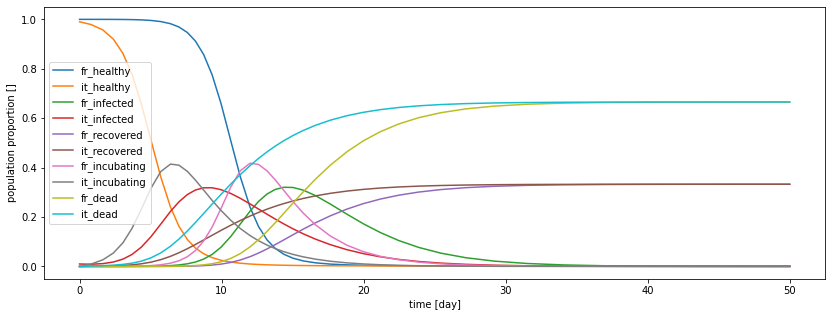

In [11]:
e.simulate()

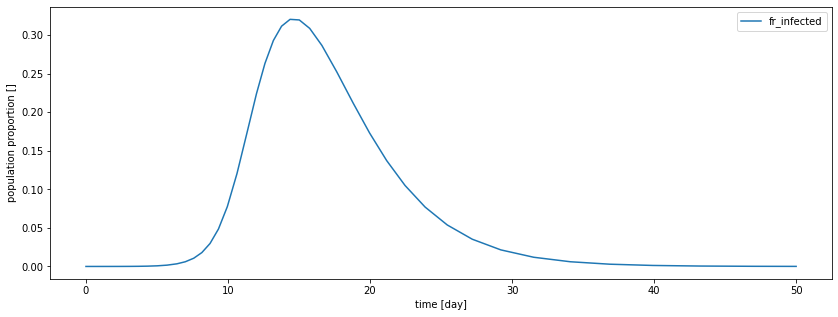

In [7]:
e._show_simu_results(countries_to_show=["fr"],labels_to_show=["infected"])